In [1]:
import requests
import json
import time
from datetime import date
from datetime import datetime
from helpers.history_fetcher import HistoryFetcher
import dateutil.parser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gdelt # pip install gdelt
import folium
import os
from tqdm import tqdm_notebook # conda install tqdm
import operator
from helpers.wiki_helpers import get_stability_for_country, make_folium_map, wiki_change_factor

import warnings
warnings.filterwarnings('ignore')

import itertools

%load_ext autoreload
%autoreload 2

pd.options.mode.chained_assignment = None
import gc

In [65]:
CAMEO_event_dic = {(1,'MAKE PUBLIC STATEMENT'), 
                   (2,'APPEAL'), 
                   (3,'EXPRESS INTENT TO COOPERATE'), 
                   (4,'CONSULT'), 
                   (5,'ENGAGE IN DIPLOMATIC COOPERATION'), 
                   (6,'ENGAGE IN MATERIAL COOPERATION'), 
                   (7,'PROVIDE AID'), 
                   (8,'YIELD'), 
                   (9,'INVESTIGATE'), 
                   (10,'DEMAND'), 
                   (11,'DISAPPROVE'), 
                   (12,'REJECT'), 
                   (13,'THREATEN'), 
                   (14,'PROTEST'), 
                   (15,'EXHIBIT FORCE POSTURE'), 
                   (16,'REDUCE RELATIONS'), 
                   (17,'COERCE'), 
                   (18,'ASSAULT'), 
                   (19,'FIGHT'), 
                   (20,'USE UNCONVENTIONAL MASS VIOLENCE'), 
                   (np.NaN,'')}
CAMEO_event_dic

{(1, 'MAKE PUBLIC STATEMENT'),
 (2, 'APPEAL'),
 (3, 'EXPRESS INTENT TO COOPERATE'),
 (4, 'CONSULT'),
 (5, 'ENGAGE IN DIPLOMATIC COOPERATION'),
 (6, 'ENGAGE IN MATERIAL COOPERATION'),
 (7, 'PROVIDE AID'),
 (8, 'YIELD'),
 (9, 'INVESTIGATE'),
 (10, 'DEMAND'),
 (13, 'THREATEN'),
 (19, 'FIGHT'),
 (nan, ''),
 (11, 'DISAPPROVE'),
 (12, 'REJECT'),
 (14, 'PROTEST'),
 (15, 'EXHIBIT FORCE POSTURE'),
 (16, 'REDUCE RELATIONS'),
 (17, 'COERCE'),
 (18, 'ASSAULT'),
 (20, 'USE UNCONVENTIONAL MASS VIOLENCE')}

In [44]:
aggregated_gdelt = pd.read_pickle('data/20.pckl')

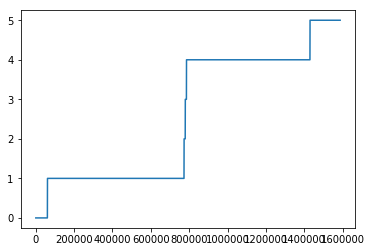

In [70]:
dates = aggregated_gdelt.index.get_level_values('ActionGeo_Type')
dates.max()

plt.plot(sorted(dates))
plt.show()

In [43]:
from os import listdir
from os.path import isfile, join
import gc

def process_files():
    onlyfiles = [f for f in listdir('.') if isfile(join('.', f))]
    
    grouped = pd.DataFrame()
    for i, file in enumerate(onlyfiles):
        print('processing ', file)
        gc.collect()
        try:
            data = pd.read_pickle(file)
            data['Counter'] = 1.0
            data = data[['SQLDATE','ActionGeo_CountryCode', 'ActionGeo_Type', 'Counter']]
        except:
            continue;
        grouped = grouped.append([data.groupby(['SQLDATE','ActionGeo_CountryCode', 'ActionGeo_Type']).sum()])
        pd.to_pickle(grouped, 'processed/'+str(i)+'.pckl')
        del data
    
    

['.DS_Store',
 'Untitled.ipynb',
 '__init__.py',
 'countries_data2.pckl',
 'README.md',
 'Milestone2_v2.ipynb',
 'countries_data_relevant.pkl',
 'Milestone2.ipynb',
 'countries_data.pkl',
 'countries_corrected.geo.json',
 'countries_data.pckl']

In [38]:
pd.Timestamp('20140201', periods=24)
rng = pd.date_range('1/1/2011', periods=72, freq='H')

val
SQLDATE  ActionGeo_CountryCode ActionGeo_Type     
20111001 AE                    4.0               7
         AF                    1.0              24
                               4.0              56
                               5.0               6
         AG                    1.0               9
                               4.0              10
         AJ                    1.0               2
                               4.0               4
         AM                    1.0               3
                               4.0              33
         AS                    1.0               6
                               4.0              15
         AU                    1.0               4
                               4.0               3
                               5.0               6
         BA                    1.0              19
                               4.0              22
         BE                    1.0              10
                               4.0              11
         BF                    1.0               3
                               4.0               6
         BG                    1.0               1
                               4.0               4
         BH                    4.0               1
         BK                    4.0               6
         BM                    0.0               1
                               4.0               3
         BO                    4.0              14
         BR                    1.0               1
                               4.0               3
...                                            ...
         SU                    1.0               1
                               4.0               1
         SY                    1.0               4
                               4.0              18
         SZ                    4.0               2
         TD                    5.0               1
         TH                    1.0               2
                               4.0               8
         TI                    4.0               1
         TS                    4.0               1
         TU                    1.0               3
                               4.0              11
         TW                    1.0               3
                               4.0               2
         TX                    1.0               1
                               4.0               4
         UG                    4.0               4
         UK                    1.0               7
                               4.0               8
         UP                    4.0               5
         US                    1.0              15
                               2.0              29
                               3.0              51
         UZ                    4.0               2
         VE                    1.0               1
         VM                    4.0               2
         WA                    4.0               1
         WE                    1.0               1
         YM                    4.0               5
         ZA                    4.0               5

[176 rows x 1 columns]

In [14]:
gc.collect()
data_gdelt13_17 = pd.read_pickle('data/gdelt_filtered_2013_1.pckl')
gc.collect()
data_gdelt13_17.append([pd.read_pickle('data/gdelt_filtered_2013_1.pckl')], ignore_index=True)
pd.to_pickle(data_gdelt13_17, 'data_gdelt11_13.pckl')

,SQLDATE,ActionGeo_CountryCode,ActionGeo_Type
0,20151212,KZ,1
1,20151212,KZ,1
2,20151212,US,1
3,20151212,MX,1
4,20151212,US,2
5,20151212,UK,4
6,20151212,UK,4
7,20151212,US,3
8,20151212,US,3
9,20151212,US,2
